# Intro

Heteroscedasticity {هتروسیداستیک} means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the `residuals or error` term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity).

To satisfy the regression assumptions and be able to trust the results, the residuals should have a constant variance. 

https://www.stat.cmu.edu/~cshalizi/350/lectures/18/lecture-18.pdf


https://statisticsbyjim.com/regression/heteroscedasticity-regression

# How to Identify Heteroscedasticity with Residual Plots


Heteroscedasticity produces a distinctive fan or cone shape in residual plots. To check for heteroscedasticity, you need to assess the residuals by fitted value plots specifically. Typically, the telltale pattern for heteroscedasticity is that as the fitted values increases, the variance of the residuals also increases.

![](./i/heteroscedasticity_regression.png)

# What Causes Heteroscedasticity?

Heteroscedasticity, also spelled heteroskedasticity, occurs more often in datasets that have `a large range between the largest and smallest observed values`. While there are numerous reasons why heteroscedasticity can exist, a common explanation is that the error variance changes proportionally with a factor. This factor might be a variable in the model.

In some cases, the variance increases proportionally with this factor but remains constant as a percentage. For instance, a 10% change in a number such as 100 is much smaller than a 10% change in a large number such as 100,000. In this scenario, you expect to see larger residuals associated with higher values. That’s why you need to be careful when working with wide ranges of values!

Because large ranges are associated with this problem, some types of models are more prone to heteroscedasticity.



# Heteroscedasticity in cross-sectional studies
Cross-sectional studies often have very small and large values and,
thus, are more likely to have heteroscedasticity. For example, a crosssectional study that involves the United States can have very low values for Delaware and very high values for California. Similarly, crosssectional studies of incomes can have a range that extends from poverty to billionaires.



# Heteroscedasticity in time-series models

A time-series model can have heteroscedasticity if the dependent variable changes significantly from the beginning to the end of the series. For example, if we model the sales of DVD players from their first sales in 2000 to the present, the number of units sold will be vastly different. Additionally, if you’re modeling time series data and measurement error changes over time, heteroscedasticity can be present because regression analysis includes measurement error in the error term. For example, if measurement error decreases over time as better methods are introduced, you’d expect the error variance to diminish over time as well.

# Example of heteroscedasticity
Let’s take a look at a classic example of heteroscedasticity. If you
model household consumption based on income, you’ll find that the
variability in consumption increases as income increases. Lower income households are less variable in absolute terms because they need
to focus on necessities and there is less room for different spending
habits. Higher income households can purchase a wide variety of luxury items, or not, which results in a broader spread of spending habits.

# Pure versus impure heteroscedasticity
You can categorize heteroscedasticity into two general types.

1. Pure heteroscedasticity refers to cases where you specify the correct model and yet you observe non-constant variance in the residual plots.
2.  Impure heteroscedasticity refers to cases where you incorrectly specify the model, and that causes the non-constant variance. When you leave an important variable out of a model, the omitted effect is absorbed into the error term. If the effect of the omitted variable varies throughout the observed range of data, it can produce the telltale signs of heteroscedasticity in the residual plots.


When you observe heteroscedasticity in the residual plots, it is important to determine whether you have pure or impure heteroscedasticity because the solutions are different. If you have the impure form,
you need to identify the important variable(s) that have been left out
of the model and refit the model with those variables. 

The causes for heteroscedasticity vary widely by subject-area. If you
detect heteroscedasticity in your model, you’ll need to use your expertise to understand why it occurs. Often, the key is to identify the proportional factor that is associated with the changing variance.



# What Problems Does Heteroscedasticity Cause?
As I mentioned earlier, linear regression assumes that the spread of
the residuals is constant across the plot. Anytime that you violate an
assumption, there is a chance that you can’t trust the statistical results.
Why fix this problem? There are two big reasons why you want homoscedasticity:

- While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

- Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase. Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. This problem can lead you to conclude that a model term is statistically significant when it is actually not significant.


# How to Fix Heteroscedasticity
If you can figure out the reason for the heteroscedasticity, you might
be able to correct it and improve your model. 
These methods
are appropriate for pure heteroscedasticity but are not necessarily
valid for the impure form.

We’ll use Accident as the dependent variable and Population for the independent variable.
## Redefining the variables

If your model is a cross-sectional model that includes large differences
between the sizes of the observations, you can find different ways to
specify the model that reduces the impact of the size differential. To
do this, change the model from using the raw measure to using rates
and per capita values. Of course, this type of model answers a slightly
different kind of question. You’ll need to determine whether this approach is suitable for both your data and what you need to learn.

![](./i/Redefining.png)

However, we can change the model so that we use population to predict the accident rate. This approach discounts the impact of scale and gets to the underlying behavior. Let’s try this with our example data set. I’ll use Accident Rate as the dependent variable and Population as the independent variable. The residual plot is below.

The residuals by fitted value plot looks better. If it weren’t for a few pesky values in the very high range, it would be useable. If this approach had produced homoscedasticity, I would stick with this solution and not use the following methods.


## Weighted regression
Weighted regression is a method that assigns each data point a weight based on the variance of its fitted value. The idea is to give small weights to observations associated with higher variances to shrink their squared residuals. Weighted regression minimizes the sum of the weighted squared residuals. When you use the correct weights, heteroscedasticity is replaced by homoscedasticity.

For weighted regression, it is important to assess the standardized residuals because only that type of residual will show us that weighted regression fixed the heteroscedasticity.


## Transform the dependent variable
I always save transforming the data for the last resort because it involves the most manipulation. It also makes interpreting the results very difficult because the units of your data are gone. The idea is that you transform your original data into different values that produce good looking residuals. If nothing else works, try a transformation to produce homoscedasticity.

I’ll refit the original model but use a Box-Cox transformation on the dependent variable.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df  = pd.read_csv("Heteroscedasticity.csv")

list(df)

['Accidents', 'AccidentRate', 'Population', 'Weight']

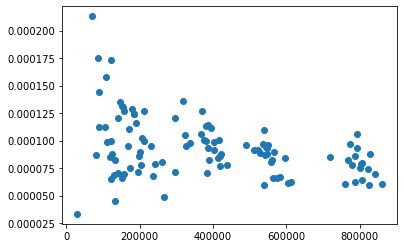

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X_train = df['Population'].values.reshape(-1,1)
y_train = df['AccidentRate'].values.reshape(-1,1)

plt.scatter(X_train, y_train)
plt.show()

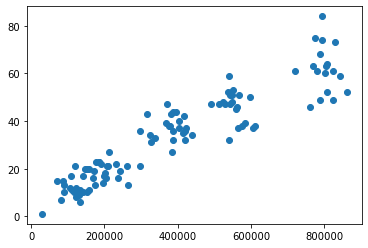

In [12]:
X_train = df['Population'].values.reshape(-1,1)
y_train = df['Accidents'].values.reshape(-1,1)

plt.scatter(X_train, y_train)
plt.show()